# 機械学習 課題3

※ セルを増やしても構いませんが、すでに書かれているセルの内容を変更しないで下さい。

**この課題におけるベクトルは縦ベクトルとします。**

## 1. クラスタリング

$4$個の事例からなるデータ$\mathcal{D} = \{\pmb{x}_i\}_{i=1}^4$

\begin{align}
\pmb{x}_1 = \begin{pmatrix}0 \\ 0\end{pmatrix},\;
\pmb{x}_2 = \begin{pmatrix}1 \\ 1\end{pmatrix},\;
\pmb{x}_3 = \begin{pmatrix}2 \\ 1\end{pmatrix},\;
\pmb{x}_4 = \begin{pmatrix}0 \\ 2\end{pmatrix}
\end{align}

をクラスタリングしたい。以下の問に答えよ。なお、計算は手計算でもプログラムを用いてもよいが、最終的な答えに至る経過が分かるように記述せよ。数値は小数点以下第2位まで表示するか、平方根を使って表示せよ。また、クラスタを統合するときの距離が等しいなどの理由で、クラスタの作り方が2通り以上ある場合は、そのうちのいずれかを答えればよい。

In [1]:
import numpy as np
import scipy.cluster.hierarchy
import scipy.spatial.distance
from matplotlib import pyplot as plt

**(1) 距離行列の計算（マンハッタン距離）**

距離関数としてマンハッタン距離を用いて、データ$\mathcal{D}$の距離行列を求めよ。<!-- 1(1) -->

In [2]:
def Manhattan_distance(X: np.ndarray) -> np.ndarray:
    """
    Compute the Manhattan distance matrix between each pair of points
    :param X: A matrix of shape (n, 2) where each row is a point in 2D
    :return: A matrix of shape (n, n) where the (i, j)th entry is the Manhattan distance between the i-th and j-th point
    """
    n = X.shape[0]
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dists[i, j] = np.sum(np.abs(X[i] - X[j]))
    return dists

X: np.ndarray = np.array([[0, 0], [1, 1], [2, 1], [0, 2]])

Manhattan_distance(X)

array([[0., 2., 3., 2.],
       [2., 0., 1., 2.],
       [3., 1., 0., 3.],
       [2., 2., 3., 0.]])

In [3]:
D = scipy.spatial.distance.pdist(X, metric="cityblock")
scipy.spatial.distance.squareform(D)

array([[0., 2., 3., 2.],
       [2., 0., 1., 2.],
       [3., 1., 0., 3.],
       [2., 2., 3., 0.]])

**(2) 距離行列の計算（ユークリッド距離）**

距離関数としてユークリッド距離を用いて、データ$\mathcal{D}$の距離行列を求めよ。<!-- 1(2) -->

In [4]:
def distace_matrix(X: np.ndarray) -> np.ndarray:
    """
    Compute the Euclidean distance matrix between each pair of points
    :param X: A matrix of shape (n, 2) where each row is a point in 2D
    :return: A matrix of shape (n, n) where the (i, j)th entry is the distance between the i-th and j-th point
    """
    n = X.shape[0]
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dists[i, j] = np.linalg.norm(X[i] - X[j])
    return dists

distace_matrix(X)

array([[0.        , 1.41421356, 2.23606798, 2.        ],
       [1.41421356, 0.        , 1.        , 1.41421356],
       [2.23606798, 1.        , 0.        , 2.23606798],
       [2.        , 1.41421356, 2.23606798, 0.        ]])

In [5]:
D = scipy.spatial.distance.pdist(X, metric="euclidean")
scipy.spatial.distance.squareform(D)

array([[0.        , 1.41421356, 2.23606798, 2.        ],
       [1.41421356, 0.        , 1.        , 1.41421356],
       [2.23606798, 1.        , 0.        , 2.23606798],
       [2.        , 1.41421356, 2.23606798, 0.        ]])

**(3) ウォード法**

データ$\mathcal{D}$に対して、初期クラスタを$C_1 = \{\pmb{x}_1\}, C_2 = \{\pmb{x}_2\}, C_3 = \{\pmb{x}_3\}, C_4 = \{\pmb{x}_4\}$として、ウォード法（Ward's method）によるクラスタリングを行いたい。

**(a) 最初の統合**

任意の2つの異なるクラスタ $A, B, \in \{C_1, C_2, C_3, C_4\}$ $(A \neq B)$ に対して、式11.17を計算し、ウォード法で最初に統合されるクラスタの組$A^*, B^*$と、その時の式11.17の値（$\mathrm{dist}_{\mathrm{ward}}(A^*, B^*)$）を答えよ。答え方の例を以下に示す。

+ 統合されるクラスタ: $\{\pmb{x}_1\}, \{\pmb{x}_2\}$
+ 式11.17の値: 1.44
<!-- 1(3)(a) -->

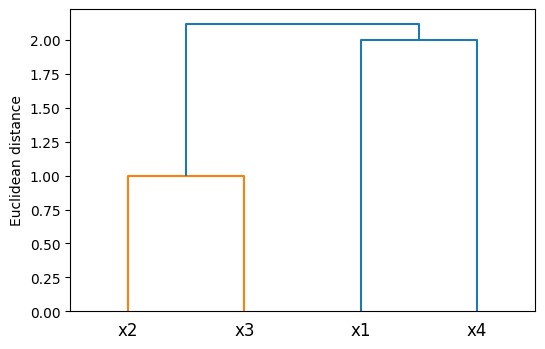

In [6]:
x1: np.ndarray = np.array([0, 0])
x2: np.ndarray = np.array([1, 1])
x3: np.ndarray = np.array([2, 1])
x4: np.ndarray = np.array([0, 2])

X = np.array([x1, x2, x3, x4])

Z = scipy.cluster.hierarchy.linkage(scipy.spatial.distance.pdist(X, metric="euclidean"), method="ward")

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=["x1", "x2", "x3", "x4"], ax=ax)
ax.set_ylabel("Euclidean distance")
plt.show()

- 結合されるクラスタ: {C2}, {C3}
- 式11.17の値: 1.00  

![](../public/ward.png)

**(b) 2回目の統合**

(a)においてクラスタの統合が行われた結果、クラスタ数は3となる。これらのクラスタを改めて$C_1, C_2, C_3$と書き直す。任意の2つの異なるクラスタに対して、式11.17を計算し、ウォード法で次に統合されるクラスタの組$A^*, B^*$と、その時の式11.17の値（$\mathrm{dist}_{\mathrm{ward}}(A^*, B^*)$）を答えよ。答え方の例を以下に示す。

+ 統合されるクラスタ: $\{\pmb{x}_1, \pmb{x}_2\}, \{\pmb{x}_3\}$
+ 式11.17の値: 1.67
<!-- 1(3)(b) -->

- 結合されるクラスタ: {C1}, {C3}
- 式11.17の値: 2.00  

## 2. 主成分分析

適切な題材を選び、主成分分析（PCA）を行った結果をまとめよ。ただし、以下の観点で採点を行うので、これらを満たすように解答せよ。また、分析に用いたプログラムもJupyter Notebookにまとめよ。

+ 選んだデータの説明
+ 累積寄与率のグラフ
+ 第一主成分と第二主成分のベクトル
+ 主成分分析から分かったこと

**(1) データの説明**

選んだデータの概要（提供者、内容、データのサイズなど）を説明せよ。<!-- 2(1) -->

機械学習帳 13 主成分分析(2) で紹介されている [教育用標準データセット](https://www.nstac.go.jp/SSDSE/)を用いる。
特に、「B: 都道府県別、時系列、多分野データ」を用いる。

そのうち、人口関連のデータと、それらと関係が想像できる'結婚件数', '出生数','死亡数' を抜き出す。

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
SSDSE_df = pd.read_csv('https://www.nstac.go.jp/SSDSE/data/2021/SSDSE-B-2021.csv', encoding='shift-jis', skiprows=1)

SSDSE_df = SSDSE_df[['年度','都道府県', '15歳未満人口','15〜64歳人口', '婚姻件数', '出生数', '65歳以上人口','死亡数']]
SSDSE_df = SSDSE_df.iloc[0:]
SSDSE_df = SSDSE_df[SSDSE_df['年度'] == 2018]
SSDSE_df

,年度,都道府県,15歳未満人口,15〜64歳人口,婚姻件数,出生数,65歳以上人口,死亡数
0,2018,北海道,577000,3052000,22916,32642,1656000,64187
12,2018,青森県,137000,714000,4737,7803,412000,17936
24,2018,岩手県,140000,697000,4439,7615,403000,17390
36,2018,宮城県,276000,1396000,10328,16211,643000,24520
48,2018,秋田県,98000,526000,3052,5040,357000,15434
60,2018,山形県,127000,605000,4039,6973,358000,15320
72,2018,福島県,216000,1072000,7685,12495,576000,24747
84,2018,茨城県,349000,1696000,12332,19368,833000,32927
96,2018,栃木県,240000,1160000,8182,13495,546000,21885
108,2018,群馬県,237000,1141000,8088,12922,574000,22937


In [9]:
SSDSE_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 552
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   年度        47 non-null     int64 
 1   都道府県      47 non-null     object
 2   15歳未満人口   47 non-null     int64 
 3   15〜64歳人口  47 non-null     int64 
 4   婚姻件数      47 non-null     int64 
 5   出生数       47 non-null     int64 
 6   65歳以上人口   47 non-null     int64 
 7   死亡数       47 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.3+ KB


**(2) 累積寄与率**

累積寄与率のグラフを描け。<!-- 2(2) -->

SSDSE_dfから、年度の情報を切り落とす。
そして、さらにデータを$47\times6$の行列に変換する。
都道府県名は変数 prefectures に保存しておく、また対象とした列名も targetColumns に保存しておく

In [10]:
SSDSE_df.drop(['年度'], axis=1, inplace=True)
SSDSE_df_values = SSDSE_df.iloc[:,1:].values
SSDSE_df_values

array([[ 577000, 3052000,   22916,   32642, 1656000,   64187],
       [ 137000,  714000,    4737,    7803,  412000,   17936],
       [ 140000,  697000,    4439,    7615,  403000,   17390],
       [ 276000, 1396000,   10328,   16211,  643000,   24520],
       [  98000,  526000,    3052,    5040,  357000,   15434],
       [ 127000,  605000,    4039,    6973,  358000,   15320],
       [ 216000, 1072000,    7685,   12495,  576000,   24747],
       [ 349000, 1696000,   12332,   19368,  833000,   32927],
       [ 240000, 1160000,    8182,   13495,  546000,   21885],
       [ 237000, 1141000,    8088,   12922,  574000,   22937],
       [ 891000, 4505000,   32745,   51241, 1934000,   67726],
       [ 748000, 3785000,   28202,   43404, 1721000,   59561],
       [1550000, 9084000,   82716,  107150, 3189000,  119253],
       [1111000, 5761000,   45079,   66564, 2305000,   82336],
       [ 260000, 1270000,    8612,   14509,  716000,   30068],
       [ 122000,  593000,    4234,    6846,  336000,   

In [11]:
prefectures = SSDSE_df.iloc[:,0].values
prefectures

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

In [12]:
targetColumns = SSDSE_df.columns[1:].values
targetColumns

array(['15歳未満人口', '15〜64歳人口', '婚姻件数', '出生数', '65歳以上人口', '死亡数'],
      dtype=object)

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
P = pca.fit_transform(SSDSE_df_values)

pd.DataFrame(pca.components_, columns=targetColumns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

,15歳未満人口,15〜64歳人口,婚姻件数,出生数,65歳以上人口,死亡数
PC1,0.169838,0.920329,0.007859,0.010899,0.351864,0.012653
PC2,-0.127683,0.374658,0.013274,0.006175,-0.917593,-0.033735
PC3,0.975967,-0.111371,-0.006143,0.045246,-0.180225,-0.022797
PC4,0.010612,0.011712,-0.524204,-0.538394,0.016342,-0.659413
PC5,-0.032188,-0.008007,0.422707,0.506847,0.038293,-0.749572
PC6,0.034535,-0.004555,0.739090,-0.671591,0.000931,-0.038708


/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_26666/240422092.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


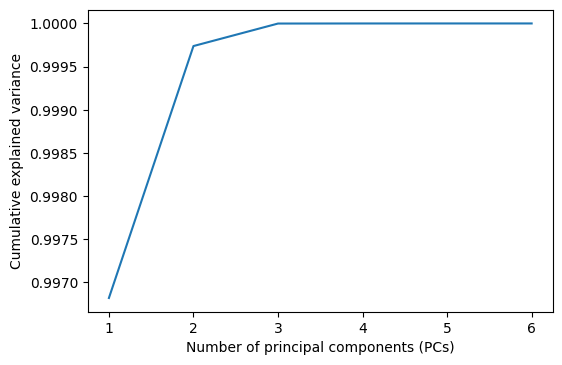

In [14]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

**(3)  第一主成分と第二主成分**

データの事例を第一主成分と第二主成分の軸に射影し、データを２次元平面上にプロットせよ。<!-- 2(3) -->

In [16]:
import japanize_matplotlib

/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_26666/1262052427.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


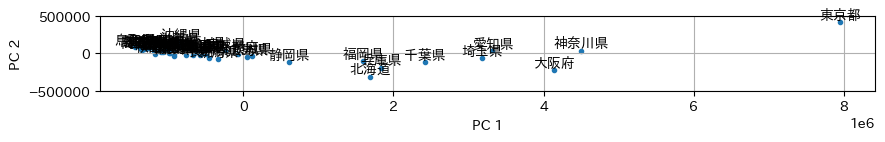

In [17]:
fig = plt.figure(dpi=100, figsize=(10, 600))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_ylim(-500000, 500000)
m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(prefectures):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')
ax.set_aspect('equal')
ax.grid()
fig.show()

**(4) 主成分分析から分かったこと**

主成分分析からデータに関して得られた知見をまとめよ。<!-- 2(4) -->